In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import math
import random
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)


sns.set_style(style="darkgrid")

[('the', 62353), ('vaccine', 57869), ('to', 45532), ('covid', 32281), ('of', 31094), ('19', 29520), ('and', 26943), ('a', 25480), ('for', 22703), ('in', 22025), ('pfizer', 21137), ('is', 17809), ('s', 15434), ('i', 14439), ('you', 11806), ('it', 11557), ('are', 11277), ('that', 10425), ('at', 10158), ('on', 9933), ('amp', 9694), ('j', 9514), ('be', 8833), ('get', 8774), ('have', 8585), ('moderna', 8488), ('with', 8426), ('from', 7950), ('this', 7852), ('my', 7611), ('t', 7508), ('not', 7269), ('as', 6473), ('available', 6381), ('will', 6304), ('dose', 6130), ('by', 5987), ('appointments', 5554), ('your', 5550), ('or', 5517), ('people', 5247), ('can', 5219), ('we', 5130), ('they', 5098), ('but', 5002), ('was', 4927), ('more', 4874), ('first', 4787), ('after', 4692), ('has', 4603)]


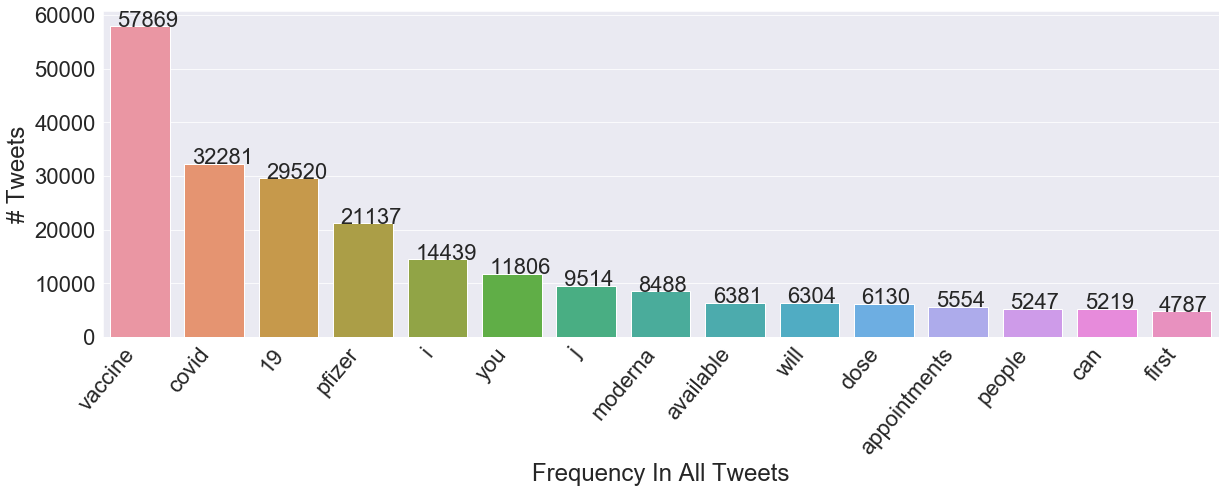

In [10]:
#top 50 frequent words from total tweets
from collections import Counter
hist_kws = {'alpha': 1}
dfs = pd.read_csv('t_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()

split_it = total_w.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(50)
print(most_occur)

#From the top 50 frequent words, we select 10 words
key = ['vaccine','covid', '19', 'pfizer', 'i', 'you', 'j', 'moderna', 'available', 'will', 'dose', 'appointments', 'people', 'can', 'first']
num = [57869, 32281, 29520, 21137, 14439, 11806, 9514, 8488, 6381, 6304, 6130, 5554, 5247, 5219, 4787]
plt.figure(figsize=(20,6))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = sns.barplot(key,num)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel('Frequency In All Tweets')
plt.ylabel('# Tweets')

plt.savefig('./Frequency_total.png', bbox_inches='tight')
plt.show()



[('vaccine', 17857), ('the', 14129), ('covid', 11787), ('to', 11163), ('19', 11064), ('of', 7292), ('for', 5987), ('pfizer', 5511), ('in', 5452), ('and', 5447), ('a', 5351), ('s', 3719), ('is', 3369), ('from', 2746), ('you', 2728), ('j', 2531), ('amp', 2529), ('on', 2522), ('moderna', 2371), ('i', 2308), ('with', 2239), ('get', 2218), ('this', 1952), ('it', 1937), ('t', 1810), ('that', 1802), ('be', 1785), ('are', 1713), ('will', 1696), ('not', 1694), ('at', 1686), ('doses', 1670), ('my', 1634), ('have', 1631), ('by', 1444), ('your', 1351), ('as', 1335), ('can', 1299), ('johnson', 1195), ('they', 1189), ('or', 1175), ('dose', 1151), ('health', 1109), ('got', 1090), ('may', 1084), ('up', 1058), ('second', 1043), ('after', 1041), ('has', 1034), ('all', 1024)]


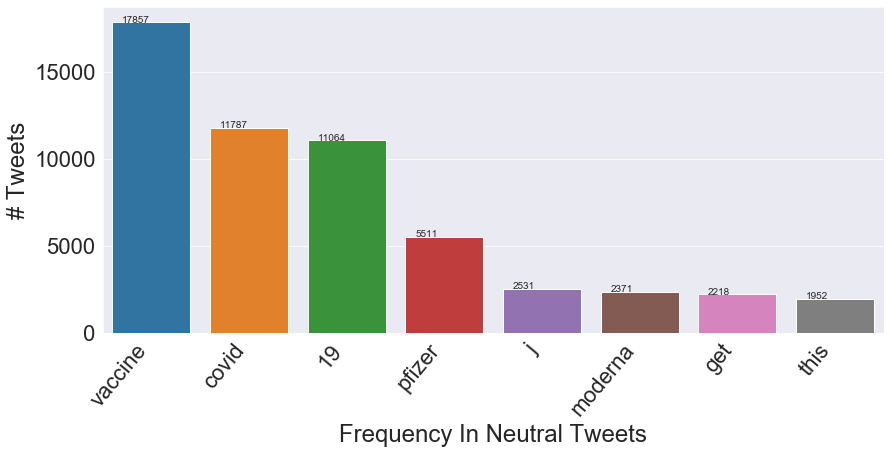

In [21]:
#top 50 frequent words from neutral tweets
from collections import Counter
hist_kws = {'alpha': 1}
dfs = pd.read_csv('neu_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()

split_it = total_w.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(50)
print(most_occur)

#From the top 50 frequent words, we select 8 words
key = ['vaccine','covid', '19', 'pfizer', 'j', 'moderna', 'get', 'this']
num = [17857, 11787, 11064, 5511, 2531, 2371, 2218, 1952]
plt.figure(figsize=(14,6))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = sns.barplot(key,num)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel('Frequency In Neutral Tweets')
plt.ylabel('# Tweets')

plt.savefig('./Frequency_Neutral.png', bbox_inches='tight')
plt.show()


[('the', 36397), ('vaccine', 30485), ('to', 26146), ('of', 17346), ('and', 16546), ('covid', 15931), ('a', 14756), ('19', 14537), ('for', 13131), ('in', 12779), ('pfizer', 11910), ('is', 10863), ('s', 8832), ('i', 8645), ('are', 7665), ('you', 7106), ('it', 7006), ('at', 6809), ('that', 6302), ('available', 6258), ('on', 5864), ('be', 5541), ('amp', 5400), ('get', 5179), ('have', 5070), ('j', 5069), ('appointments', 5028), ('moderna', 4850), ('more', 4653), ('with', 4567), ('my', 4502), ('first', 4401), ('this', 4330), ('as', 3974), ('from', 3961), ('t', 3944), ('not', 3775), ('will', 3698), ('dose', 3618), ('your', 3438), ('by', 3435), ('or', 3291), ('cvs', 3271), ('we', 3248), ('pharmacy', 3195), ('but', 3006), ('can', 2982), ('people', 2976), ('was', 2956), ('2021', 2897)]


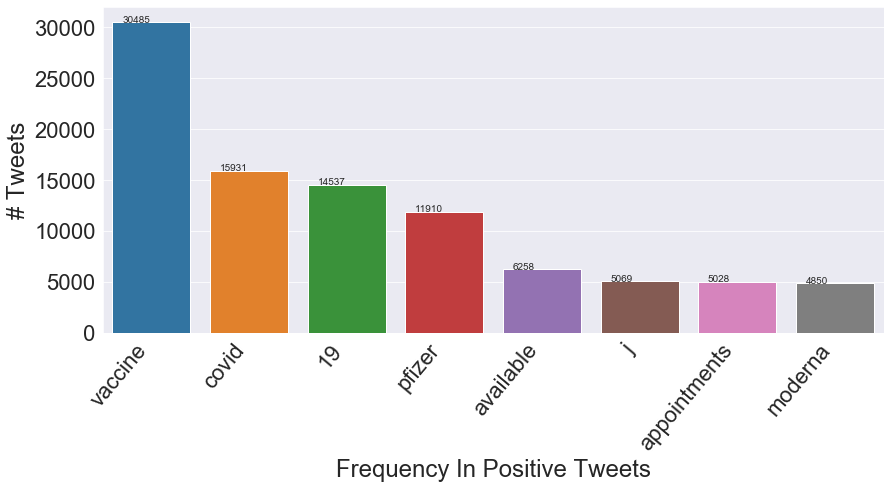

In [22]:
from collections import Counter
hist_kws = {'alpha': 1}
dfs = pd.read_csv('pos_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()

split_it = total_w.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(50)
print(most_occur)

#From the top 50 frequent words, we select 8 words
key = ['vaccine','covid', '19', 'pfizer', 'available', 'j', 'appointments', 'moderna']
num = [30485, 15931, 14537, 11910, 6258, 5069, 5028, 4850]
plt.figure(figsize=(14,6))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = sns.barplot(key,num)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel('Frequency In Positive Tweets')
plt.ylabel('# Tweets')

plt.savefig('./Frequency_Positive.png', bbox_inches='tight')
plt.show()



[('the', 11827), ('vaccine', 9526), ('to', 8223), ('of', 6456), ('a', 5373), ('and', 4950), ('covid', 4563), ('19', 3919), ('in', 3794), ('pfizer', 3716), ('for', 3585), ('is', 3577), ('i', 3486), ('s', 2883), ('it', 2614), ('that', 2321), ('you', 1972), ('j', 1914), ('are', 1899), ('have', 1884), ('not', 1800), ('amp', 1765), ('t', 1754), ('at', 1663), ('with', 1620), ('this', 1570), ('on', 1547), ('be', 1507), ('my', 1475), ('get', 1377), ('dose', 1361), ('but', 1300), ('people', 1275), ('moderna', 1267), ('from', 1243), ('was', 1179), ('as', 1164), ('they', 1139), ('by', 1108), ('one', 1100), ('after', 1073), ('or', 1051), ('had', 1030), ('has', 946), ('can', 938), ('we', 914), ('will', 910), ('who', 870), ('if', 866), ('got', 854)]


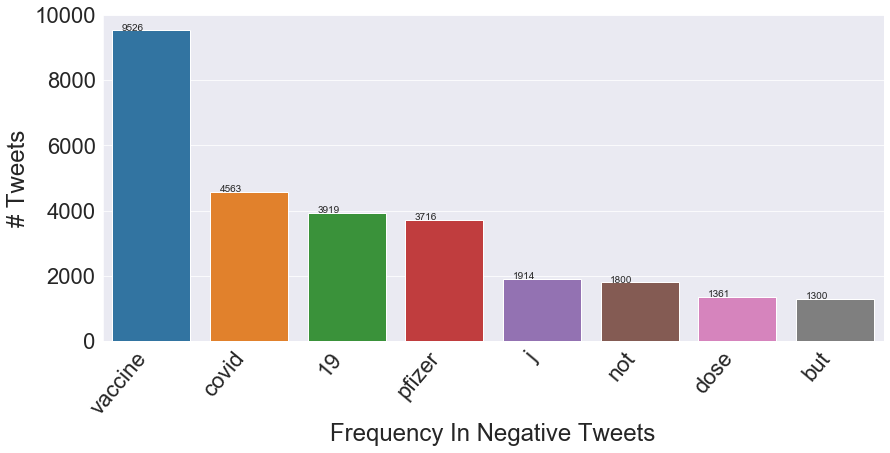

In [23]:
from collections import Counter
hist_kws = {'alpha': 1}
dfs = pd.read_csv('neg_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()

split_it = total_w.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(50)
print(most_occur)

#From the top 50 frequent words, we select 8 words
key = ['vaccine','covid', '19', 'pfizer','j', 'not', 'dose', 'but']
num = [9526, 4563, 3919, 3716, 1914, 1800, 1361, 1300]
plt.figure(figsize=(14,6))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = sns.barplot(key,num)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel('Frequency In Negative Tweets')
plt.ylabel('# Tweets')

plt.savefig('./Frequency_Negative.png', bbox_inches='tight')
plt.show()


[('the', 23156), ('vaccine', 21253), ('pfizer', 21137), ('to', 16315), ('of', 11211), ('and', 10364), ('for', 9246), ('a', 8551), ('in', 7992), ('is', 7117), ('i', 6818), ('covid', 5979), ('s', 5602), ('it', 4604), ('that', 4130), ('19', 3918), ('are', 3840), ('you', 3766), ('my', 3727), ('be', 3346), ('at', 3300), ('on', 3255), ('with', 3108), ('have', 3035), ('not', 2963), ('t', 2942), ('from', 2880), ('moderna', 2836), ('by', 2805), ('this', 2785), ('dose', 2739), ('get', 2684), ('as', 2627), ('amp', 2421), ('will', 2385), ('was', 2315), ('or', 2271), ('but', 2189), ('first', 2162), ('12', 2090), ('they', 2040), ('got', 2019), ('after', 1973), ('had', 1955), ('we', 1900), ('second', 1881), ('biontech', 1881), ('no', 1800), ('so', 1722), ('if', 1691)]


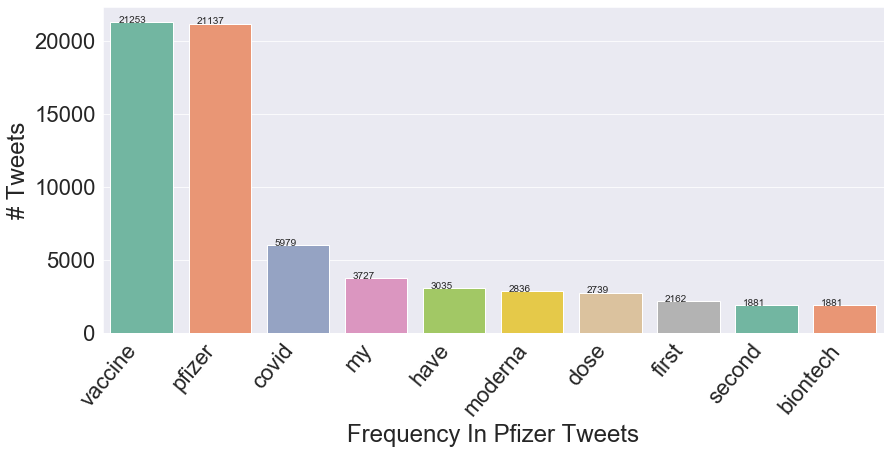

In [27]:
from collections import Counter
hist_kws = {'alpha': 1}
dfs = pd.read_csv('pfizer_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()

split_it = total_w.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(50)
print(most_occur)

#From the top 50 frequent words, we select 10 words
key = ['vaccine','pfizer', 'covid', 'my', 'have', 'moderna', 'dose', 'first', 'second','biontech']
num = [21253, 21137, 5979, 3727, 3035, 2836, 2739, 2162, 1881, 1881]
plt.figure(figsize=(14,6))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = sns.barplot(key,num,palette="Set2")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel('Frequency In Pfizer Tweets')
plt.ylabel('# Tweets')

plt.savefig('./Frequency_Pfizer.png', bbox_inches='tight')
plt.show()



[('the', 9287), ('moderna', 8488), ('vaccine', 8287), ('to', 5361), ('and', 4817), ('of', 4198), ('i', 3650), ('a', 3610), ('for', 3192), ('pfizer', 2924), ('in', 2719), ('is', 2625), ('covid', 2373), ('s', 2194), ('are', 2166), ('at', 2049), ('my', 2035), ('it', 2029), ('you', 1755), ('that', 1634), ('19', 1564), ('amp', 1563), ('on', 1434), ('or', 1399), ('have', 1368), ('be', 1349), ('t', 1308), ('dose', 1238), ('get', 1221), ('with', 1204), ('available', 1122), ('got', 1102), ('not', 1092), ('j', 1082), ('second', 1050), ('from', 1045), ('this', 1036), ('but', 1003), ('was', 994), ('vaccines', 985), ('appointments', 971), ('will', 901), ('may', 867), ('had', 850), ('as', 835), ('first', 834), ('shot', 822), ('so', 809), ('we', 798), ('they', 789)]


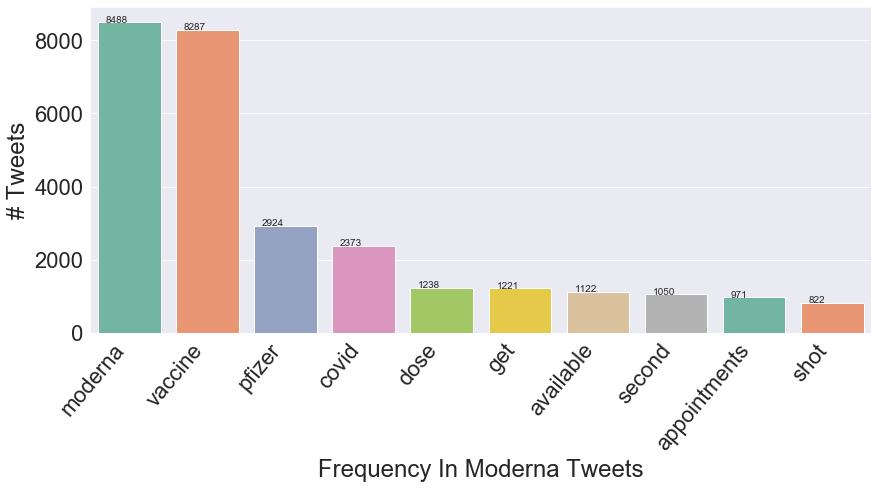

In [29]:
from collections import Counter
hist_kws = {'alpha': 1}
dfs = pd.read_csv('moderna_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()

split_it = total_w.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(50)
print(most_occur)

#From the top 50 frequent words, we select 10 words
key = ['moderna', 'vaccine','pfizer', 'covid', 'dose', 'get', 'available', 'second','appointments','shot']
num = [8488, 8287, 2924, 2373, 1238, 1221, 1122, 1050, 971, 822]
plt.figure(figsize=(14,6))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = sns.barplot(key,num,palette="Set2")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel('Frequency In Moderna Tweets')
plt.ylabel('# Tweets')

plt.savefig('./Frequency_Moderna.png', bbox_inches='tight')
plt.show()

[('j', 8749), ('the', 7540), ('amp', 6141), ('vaccine', 5928), ('to', 3700), ('and', 3177), ('of', 3043), ('johnson', 2743), ('a', 2437), ('in', 2069), ('is', 1950), ('for', 1945), ('i', 1821), ('covid', 1799), ('s', 1567), ('it', 1438), ('19', 1374), ('that', 1338), ('are', 1122), ('on', 1087), ('you', 1078), ('pfizer', 1065), ('be', 970), ('moderna', 964), ('with', 921), ('t', 918), ('at', 915), ('have', 909), ('not', 832), ('get', 783), ('from', 775), ('was', 767), ('but', 758), ('or', 755), ('vaccines', 703), ('people', 673), ('this', 644), ('one', 638), ('they', 624), ('will', 607), ('we', 581), ('blood', 578), ('after', 545), ('can', 537), ('my', 535), ('as', 531), ('has', 529), ('if', 518), ('got', 500), ('shot', 484)]


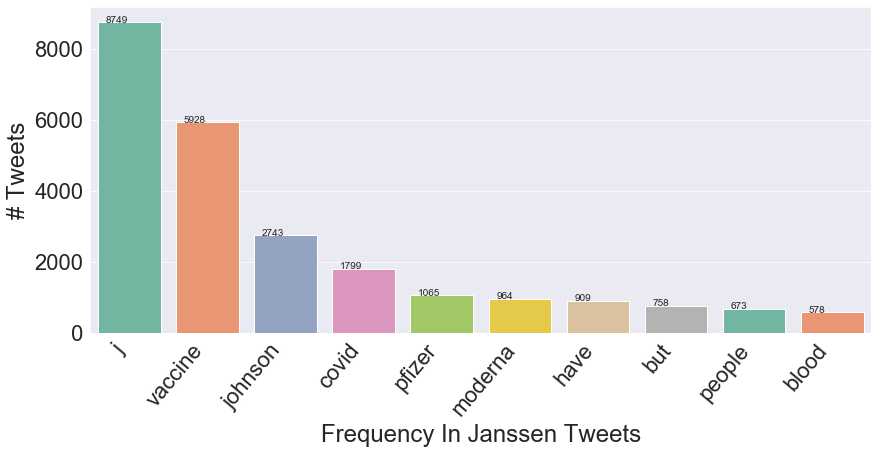

In [31]:
from collections import Counter
hist_kws = {'alpha': 1}
dfs = pd.read_csv('janssen_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()

split_it = total_w.split()
Counter = Counter(split_it)
most_occur = Counter.most_common(50)
print(most_occur)

#From the top 50 frequent words, we select 10 words
key = ['j', 'vaccine','johnson', 'covid', 'pfizer', 'moderna', 'have', 'but','people','blood']
num = [8749, 5928, 2743, 1799, 1065, 964, 909, 758, 673, 578]
plt.figure(figsize=(14,6))
plt.rcParams["font.family"] = 'Arial Unicode MS'
ax = sns.barplot(key,num,palette="Set2")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.xticks(rotation=50, horizontalalignment='right')
plt.xlabel('Frequency In Janssen Tweets')
plt.ylabel('# Tweets')

plt.savefig('./Frequency_Janssen.png', bbox_inches='tight')
plt.show()

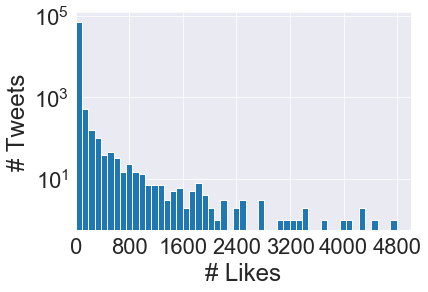

0 46960
The avrage is 12.183835136764158
The median is 0.0


In [53]:
fav_num = []
hist_kws = {'alpha': 1}
dfs = pd.read_csv('t_data.csv')
for f in dfs['favorite_count']:
    fav_num.append(f)
    
ax = sns.distplot(fav_num, bins=500,hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Likes')
plt.ylabel('# Tweets')
plt.xlim([0, 5000])
plt.xticks([0,800, 1600,2400,3200,4000,4800])
ax.set_yscale('log')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("./numOfLikes.png",bbox_inches='tight')
plt.show()

print(min(fav_num),max(fav_num))
#AVRAGE
nsum=0
for i in range(len(fav_num)):
    nsum += fav_num[i]
    avrage = nsum / len(fav_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [fav_num[i] for i in range(len(fav_num))]
listnum.sort()
lnum = len(fav_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))

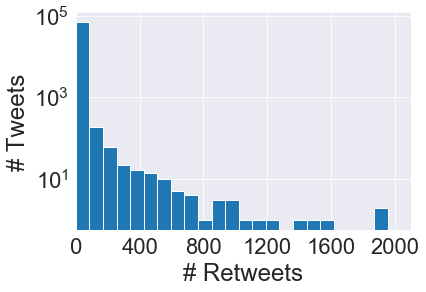

0 8516
The avrage is 2.8951235613214314
The median is 0.0


In [54]:
ret_num = []
hist_kws = {'alpha': 1}
dfs = pd.read_csv('t_data.csv')
for r in dfs['retweet_count']:
    ret_num.append(r)
    
ax = sns.distplot(ret_num, bins=100,hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Retweets')
plt.ylabel('# Tweets')
plt.xlim([0, 2100])
plt.xticks([0,400,800,1200,1600,2000])
ax.set_yscale('log')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.savefig("./numOfRetweets.png",bbox_inches='tight')
plt.show()

print(min(ret_num),max(ret_num))
#AVRAGE
nsum=0
for i in range(len(ret_num)):
    nsum += ret_num[i]
    avrage = nsum / len(ret_num)
print("The avrage is "+ str(avrage))

#MEDIAN
listnum = [ret_num[i] for i in range(len(ret_num))]
listnum.sort()
lnum = len(ret_num)
if lnum % 2 == 1:
    i = int((lnum + 1) / 2)-1
    median = listnum[i]
else:
    i = int(lnum / 2)-1
    median = (listnum[i] + listnum[i + 1]) / 2
print("The median is "+ str(median))

[12248, 3715, 6382]


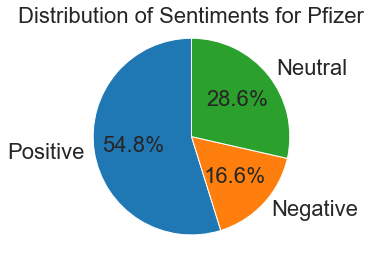

In [63]:
dfs = pd.read_csv('pfizer_data.csv')
pos_n = 0
neg_n = 0
neu_n = 0
for a in dfs['analysis']:
    if a == "positive":
        pos_n = pos_n +1
    elif a == "negative":
        neg_n = neg_n+1
    else:
        neu_n = neu_n+1
num_senti = [pos_n, neg_n, neu_n]
print(num_senti)
name_senti = ['Positive','Negative','Neutral']
plt.pie(num_senti, labels=name_senti, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Sentiments for Pfizer')
plt.savefig("./pie_pfizer.png",bbox_inches='tight')
plt.show()


[4958, 1366, 2736]


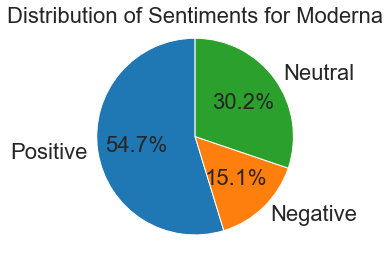

In [66]:
dfs = pd.read_csv('moderna_data.csv')
pos_n = 0
neg_n = 0
neu_n = 0
for a in dfs['analysis']:
    if a == "positive":
        pos_n = pos_n +1
    elif a == "negative":
        neg_n = neg_n+1
    else:
        neu_n = neu_n+1
num_senti = [pos_n, neg_n, neu_n]
print(num_senti)
name_senti = ['Positive','Negative','Neutral']
plt.pie(num_senti, labels=name_senti, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Sentiments for Moderna')
plt.savefig("./pie_moderna.png",bbox_inches='tight')
plt.show()



[2869, 1059, 1855]


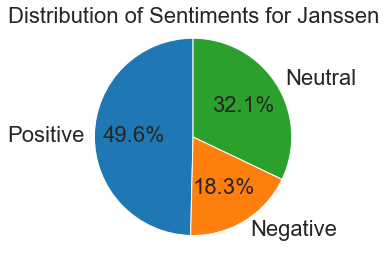

In [67]:
dfs = pd.read_csv('janssen_data.csv')
pos_n = 0
neg_n = 0
neu_n = 0
for a in dfs['analysis']:
    if a == "positive":
        pos_n = pos_n +1
    elif a == "negative":
        neg_n = neg_n+1
    else:
        neu_n = neu_n+1
num_senti = [pos_n, neg_n, neu_n]
print(num_senti)
name_senti = ['Positive','Negative','Neutral']
plt.pie(num_senti, labels=name_senti, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Sentiments for Janssen')
plt.savefig("./pie_janssen.png",bbox_inches='tight')
plt.show()

[36808, 10205, 22669]


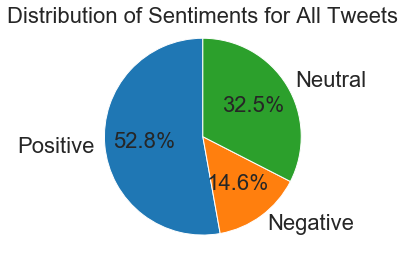

In [68]:
dfs = pd.read_csv('t_data.csv')
pos_n = 0
neg_n = 0
neu_n = 0
for a in dfs['analysis']:
    if a == "positive":
        pos_n = pos_n +1
    elif a == "negative":
        neg_n = neg_n+1
    else:
        neu_n = neu_n+1
num_senti = [pos_n, neg_n, neu_n]
print(num_senti)
name_senti = ['Positive','Negative','Neutral']
plt.pie(num_senti, labels=name_senti, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Sentiments for All Tweets')
plt.savefig("./pie_all.png",bbox_inches='tight')
plt.show()

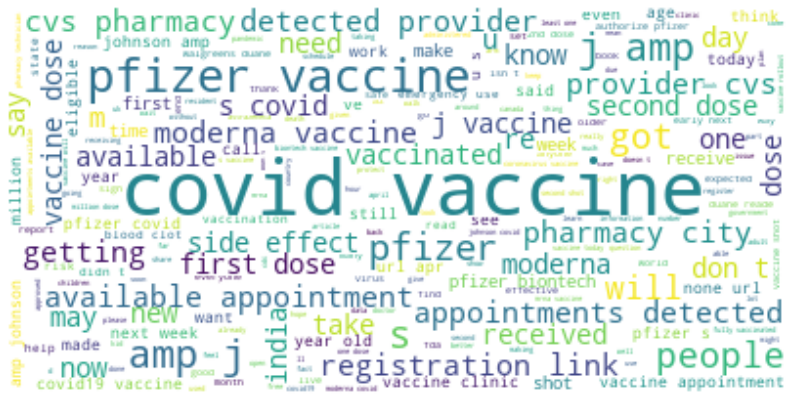

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
dfs = pd.read_csv('t_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()
stopwords = set(STOPWORDS)
#custom_mask = np.array(Image.open('5f5fcb41de07da4dfed97154_cloud-plain-2.png'))
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               max_words=1000)
wc.generate(total_w)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)
plt.figure(figsize = (14,9))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./total_wc.png",bbox_inches='tight')
plt.show()

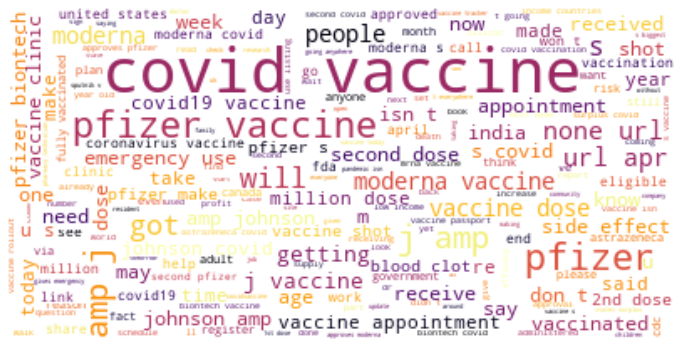

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
dfs = pd.read_csv('neu_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()
stopwords = set(STOPWORDS)
#custom_mask = np.array(Image.open('5f5fcb41de07da4dfed97154_cloud-plain-2.png'))
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               max_words=300,
               colormap=matplotlib.cm.inferno)
wc.generate(total_w)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./neu_wc.png",bbox_inches='tight')
plt.show()

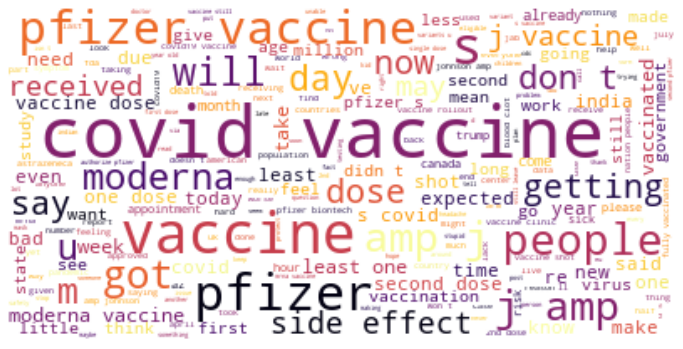

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
dfs = pd.read_csv('neg_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()
stopwords = set(STOPWORDS)
#custom_mask = np.array(Image.open('5f5fcb41de07da4dfed97154_cloud-plain-2.png'))
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               max_words=300,
               colormap=matplotlib.cm.inferno)
wc.generate(total_w)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./neg_wc.png",bbox_inches='tight')
plt.show()

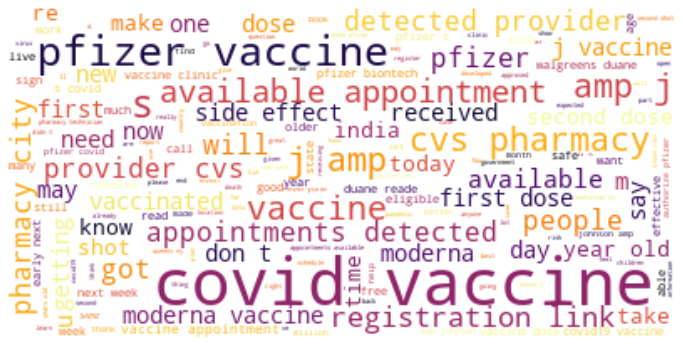

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
dfs = pd.read_csv('pos_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()
stopwords = set(STOPWORDS)
#custom_mask = np.array(Image.open('5f5fcb41de07da4dfed97154_cloud-plain-2.png'))
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               max_words=300,
               colormap=matplotlib.cm.inferno)
wc.generate(total_w)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./pos_wc.png",bbox_inches='tight')
plt.show()

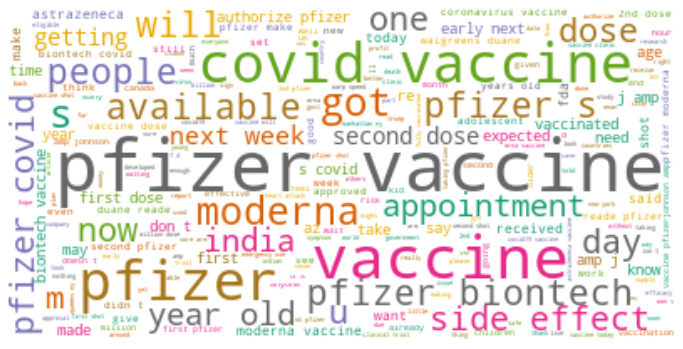

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
dfs = pd.read_csv('pfizer_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()
stopwords = set(STOPWORDS)
#custom_mask = np.array(Image.open('5f5fcb41de07da4dfed97154_cloud-plain-2.png'))
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               max_words=300,
               colormap=matplotlib.cm.Dark2)
wc.generate(total_w)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./pfizer_wc.png",bbox_inches='tight')
plt.show()

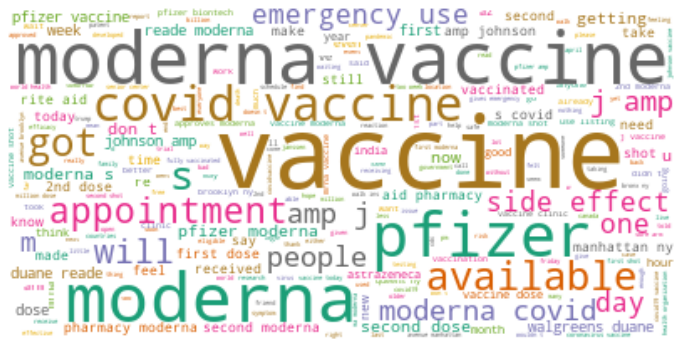

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
dfs = pd.read_csv('moderna_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()
stopwords = set(STOPWORDS)
#custom_mask = np.array(Image.open('5f5fcb41de07da4dfed97154_cloud-plain-2.png'))
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               max_words=300,
               colormap=matplotlib.cm.Dark2)
wc.generate(total_w)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./moderna_wc.png",bbox_inches='tight')
plt.show()

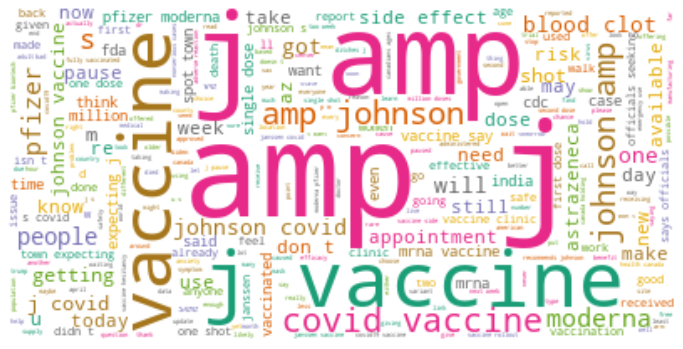

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
dfs = pd.read_csv('janssen_data.csv')
total_w = ''
for l in dfs['full_text']:
    total_w = total_w + l.lower()
stopwords = set(STOPWORDS)
#custom_mask = np.array(Image.open('5f5fcb41de07da4dfed97154_cloud-plain-2.png'))
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               max_words=400,
               colormap=matplotlib.cm.Dark2)
wc.generate(total_w)
#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = image_colors)
plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./janssen_wc.png",bbox_inches='tight')
plt.show()